In [1]:
#from google.colab import drive
#drive.mount("/content/drive")

In [2]:
import numpy as np
import pandas as pd
import re
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')

nlp=spacy.load("en_core_web_sm")
en = spacy.load("en_core_web_sm")                          
Stop_words=en.Defaults.stop_words
en.max_length=17000000 

[nltk_data] Downloading package stopwords to C:\Users\ritev.LAPTOP-
[nltk_data]     MOLE23F5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ritev.LAPTOP-
[nltk_data]     MOLE23F5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#df_r=pd.read_csv("/content/drive/MyDrive/Final_Project/file2.csv")
#df_r

In [4]:
df_r=pd.read_csv("file2.csv")
df_r

,Unnamed: 0,overall,reviewTime,reviewerID,asin,reviewerName,reviewText
0,0,2.0,"09 22, 2016",A1IDMI31WEANAF,0020232233,Mackenzie Kent,when it comes to a dm s screen the space on th...
1,1,1.0,"09 18, 2016",A4BCEVVZ4Y3V3,0020232233,Jonathan Christian,an open letter to galeforce9 your unpainted mi...
2,2,3.0,"09 12, 2016",A2EZ9PY1IHHBX0,0020232233,unpreparedtodie,nice art nice printing why two panels are fill...
3,3,5.0,"03 2, 2017",A139PXTTC2LGHZ,0020232233,Ashley,amazing buy bought it as a gift for our new dm...
4,4,1.0,"02 8, 2017",A3IB33V29XIL8O,0020232233,Oghma_EM,as my review of gf9 s previous screens these w...
...,...,...,...,...,...,...,...
8193610,8201226,5.0,"12 7, 2017",A3OCDEVI6FGUWU,B01HJBAKIO,wilson,my son is happy
8193611,8201227,5.0,"01 23, 2016",A1KTVUVADLKWZO,B01HJHA7GI,Raven the Maven,e my ten month old has had this for a few mont...
8193612,8201228,5.0,"02 8, 2015",A2QCA9OE62IPZ4,B01HJHA7GI,crhug,perfect toy to keep baby amused
8193613,8201229,5.0,"12 31, 2014",A3N28JAZYS4L9O,B01HJHA7GI,Cindy Volk,perfect


In [5]:
df_r.shape

(8193615, 7)

In [6]:
df_r.head()

,Unnamed: 0,overall,reviewTime,reviewerID,asin,reviewerName,reviewText
0,0,2.0,"09 22, 2016",A1IDMI31WEANAF,0020232233,Mackenzie Kent,when it comes to a dm s screen the space on th...
1,1,1.0,"09 18, 2016",A4BCEVVZ4Y3V3,0020232233,Jonathan Christian,an open letter to galeforce9 your unpainted mi...
2,2,3.0,"09 12, 2016",A2EZ9PY1IHHBX0,0020232233,unpreparedtodie,nice art nice printing why two panels are fill...
3,3,5.0,"03 2, 2017",A139PXTTC2LGHZ,0020232233,Ashley,amazing buy bought it as a gift for our new dm...
4,4,1.0,"02 8, 2017",A3IB33V29XIL8O,0020232233,Oghma_EM,as my review of gf9 s previous screens these w...


In [7]:
df_r.tail()

,Unnamed: 0,overall,reviewTime,reviewerID,asin,reviewerName,reviewText
8193610,8201226,5.0,"12 7, 2017",A3OCDEVI6FGUWU,B01HJBAKIO,wilson,my son is happy
8193611,8201227,5.0,"01 23, 2016",A1KTVUVADLKWZO,B01HJHA7GI,Raven the Maven,e my ten month old has had this for a few mont...
8193612,8201228,5.0,"02 8, 2015",A2QCA9OE62IPZ4,B01HJHA7GI,crhug,perfect toy to keep baby amused
8193613,8201229,5.0,"12 31, 2014",A3N28JAZYS4L9O,B01HJHA7GI,Cindy Volk,perfect
8193614,8201230,5.0,"11 11, 2014",A2OGYZRYRSVQZJ,B01HJHA7GI,Ostinato_Parody,i am based in the uk and i bought this item as...


In [8]:
df_r.dtypes

Unnamed: 0        int64
overall         float64
reviewTime       object
reviewerID       object
asin             object
reviewerName     object
reviewText       object
dtype: object

In [9]:
df_r.columns

Index(['Unnamed: 0', 'overall', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText'],
      dtype='object')

In [10]:
df_r.describe()

,Unnamed: 0,overall
count,8.193615e+06,8.193615e+06
mean,4.099853e+06,4.228982e+00
std,2.367464e+06,1.280675e+00
min,0.000000e+00,1.000000e+00
25%,2.049468e+06,4.000000e+00
50%,4.099435e+06,5.000000e+00
75%,6.150128e+06,5.000000e+00
max,8.201230e+06,5.000000e+00


In [11]:
df_r.describe(include='object')

,reviewTime,reviewerID,asin,reviewerName,reviewText
count,8193615,8193615,8193615,8193279,8189839
unique,6651,4201179,624631,2384651,6678409
top,"12 27, 2016",AJGU56YG8G1DQ,B000YDDF6O,Amazon Customer,great
freq,18264,1217,12666,674611,49356


In [12]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193615 entries, 0 to 8193614
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   overall       float64
 2   reviewTime    object 
 3   reviewerID    object 
 4   asin          object 
 5   reviewerName  object 
 6   reviewText    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 437.6+ MB


In [13]:
df_r.isnull().sum()

Unnamed: 0         0
overall            0
reviewTime         0
reviewerID         0
asin               0
reviewerName     336
reviewText      3776
dtype: int64

In [14]:
# Cleaning
def cleaning(text):

  text = re.sub("[^0-9A-Za-z- ]+", " ", text)  # Remove all non-letters and non-spaces except for hyphens and digits

  text = re.sub("(?<!\w)\d+", "", text)  # Remove all numbers except those attached to a word

  text = re.sub("-(?!\w)|(?<!\w)-", "", text)  # Remove all hyphens except between two words

  text = " ".join(text.split()) # Remove multiple spaces and lowercase everything

  text = text.lower() #convert all words to lower case

  return text

In [15]:
col_r=['reviewTime','reviewerID']
for i in col_r:
  df_r[i]=df_r[i].apply(str)
  df_r[i]=df_r[i].apply(cleaning)

In [16]:
df_r.drop('Unnamed: 0',axis='columns',inplace=True)

In [17]:
df_r.dropna(inplace=True)

In [18]:
df_meta=pd.read_csv("file1.csv")
df_meta

,Unnamed: 0,category,description,title,brand,main_cat,asin
0,0,"['Toys & Games', 'Puzzles', 'Jigsaw Puzzles']","[""Three Dr. Suess' Puzzles: Green Eggs and Ham...",Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,Dr. Seuss,Toys & Games,0000191639
1,1,[],['<b>Prepare to be Afraid!</b><br /><br />The ...,Pathfinder: Book of Beasts - Legendary Foes,Pathfinder Roleplaying Jon Brazer Productions,Toys & Games,0004950763
2,2,[],[],Nursery Rhymes Felt Book,Betty Lukens,Toys & Games,0005069491
3,3,"['Toys & Games', 'Games', 'Card Games']",['Blitz Vintage Card Game'],Dutch Blitz Card Game,Dutch Blitz Games Co,Toys & Games,0004983289
4,4,[],"['Marvel SuperHeroes themed ""magic ink"" colori...",Magic Pen Painting (Marvel Super Heroes),Lee Publications,Toys & Games,0006466222
...,...,...,...,...,...,...,...
633878,633878,"['Toys & Games', 'Hobbies', 'Remote & App Cont...",[],Geilienergy 6V 2000mAh NiMH RX Battery Packs w...,GEILIENERGY,Tools & Home Improvement,B01HJDFWDK
633879,633879,"['Toys & Games', 'Sports & Outdoor Play', 'Poo...",['Suitable for children ages 6-36 Months old.<...,Micord Baby Float Toddler Swimming Inflatable ...,Micord,Toys & Games,B01HJDGVFS
633880,633880,"['Toys & Games', 'Sports & Outdoor Play', 'Poo...","[""Just choose it, make you forget all the trou...","Premium Swimming Pool Float Hammock, Inflatabl...",WavePy,Toys & Games,B01HJDUNRU
633881,633881,"['Toys & Games', 'Learning & Education', 'Earl...",[],Lewo Wooden Baby Toddler Toys Circle First Bea...,Lewo,Toys & Games,B01HJFAGJI


In [19]:
df_meta.shape

(633883, 7)

In [20]:
df_meta.head()

,Unnamed: 0,category,description,title,brand,main_cat,asin
0,0,"['Toys & Games', 'Puzzles', 'Jigsaw Puzzles']","[""Three Dr. Suess' Puzzles: Green Eggs and Ham...",Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,Dr. Seuss,Toys & Games,0000191639
1,1,[],['<b>Prepare to be Afraid!</b><br /><br />The ...,Pathfinder: Book of Beasts - Legendary Foes,Pathfinder Roleplaying Jon Brazer Productions,Toys & Games,0004950763
2,2,[],[],Nursery Rhymes Felt Book,Betty Lukens,Toys & Games,0005069491
3,3,"['Toys & Games', 'Games', 'Card Games']",['Blitz Vintage Card Game'],Dutch Blitz Card Game,Dutch Blitz Games Co,Toys & Games,0004983289
4,4,[],"['Marvel SuperHeroes themed ""magic ink"" colori...",Magic Pen Painting (Marvel Super Heroes),Lee Publications,Toys & Games,0006466222


In [21]:
df_meta.tail()

,Unnamed: 0,category,description,title,brand,main_cat,asin
633878,633878,"['Toys & Games', 'Hobbies', 'Remote & App Cont...",[],Geilienergy 6V 2000mAh NiMH RX Battery Packs w...,GEILIENERGY,Tools & Home Improvement,B01HJDFWDK
633879,633879,"['Toys & Games', 'Sports & Outdoor Play', 'Poo...",['Suitable for children ages 6-36 Months old.<...,Micord Baby Float Toddler Swimming Inflatable ...,Micord,Toys & Games,B01HJDGVFS
633880,633880,"['Toys & Games', 'Sports & Outdoor Play', 'Poo...","[""Just choose it, make you forget all the trou...","Premium Swimming Pool Float Hammock, Inflatabl...",WavePy,Toys & Games,B01HJDUNRU
633881,633881,"['Toys & Games', 'Learning & Education', 'Earl...",[],Lewo Wooden Baby Toddler Toys Circle First Bea...,Lewo,Toys & Games,B01HJFAGJI
633882,633882,"['Toys & Games', 'Baby & Toddler Toys', 'Music...",[],Baby Einstein Take Along Tunes Musical Toy,Baby Einstein,Baby,B01HJHA7GI


In [22]:
df_meta.dtypes

Unnamed: 0      int64
category       object
description    object
title          object
brand          object
main_cat       object
asin           object
dtype: object

In [23]:
df_meta.columns

Index(['Unnamed: 0', 'category', 'description', 'title', 'brand', 'main_cat',
       'asin'],
      dtype='object')

In [24]:
df_meta.describe()

,Unnamed: 0
count,633883.000000
mean,316941.000000
std,182986.404679
min,0.000000
25%,158470.500000
50%,316941.000000
75%,475411.500000
max,633882.000000


In [25]:
df_meta.describe(include='object')

,category,description,title,brand,main_cat,asin
count,633883,633883,633862,626956,629189,633883
unique,5300,476457,618024,62530,37,624284
top,[],[],SeeZoom Lighted Magnifying Glass 3x 45x magnif...,Disney,Toys & Games,B00023SWQY
freq,62243,82014,244,11348,574070,2


In [26]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633883 entries, 0 to 633882
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   633883 non-null  int64 
 1   category     633883 non-null  object
 2   description  633883 non-null  object
 3   title        633862 non-null  object
 4   brand        626956 non-null  object
 5   main_cat     629189 non-null  object
 6   asin         633883 non-null  object
dtypes: int64(1), object(6)
memory usage: 33.9+ MB


In [27]:
col_meta=['category','description']
for j in col_meta:
  df_meta[j]=df_meta[j].apply(str)
  df_meta[j]=df_meta[j].apply(cleaning)

In [28]:
df_meta.drop('Unnamed: 0',axis='columns',inplace=True)

In [29]:
df_meta.isnull().sum()

category          0
description       0
title            21
brand          6927
main_cat       4694
asin              0
dtype: int64

In [30]:
df_meta.dropna(inplace=True)

In [31]:
df=pd.merge(df_r,df_meta,on='asin')

In [32]:
df.drop(['description','title'],axis='columns',inplace=True)

In [33]:
df.shape

(8392084, 9)

In [34]:
df.head()

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,category,brand,main_cat
0,2.0,,a1idmi31weanaf,0020232233,Mackenzie Kent,when it comes to a dm s screen the space on th...,toys games grown-up toys games,Gale Force Nine,Toys & Games
1,1.0,,a4bcevvz4y3v3,0020232233,Jonathan Christian,an open letter to galeforce9 your unpainted mi...,toys games grown-up toys games,Gale Force Nine,Toys & Games
2,3.0,,a2ez9py1ihhbx0,0020232233,unpreparedtodie,nice art nice printing why two panels are fill...,toys games grown-up toys games,Gale Force Nine,Toys & Games
3,5.0,,a139pxttc2lghz,0020232233,Ashley,amazing buy bought it as a gift for our new dm...,toys games grown-up toys games,Gale Force Nine,Toys & Games
4,1.0,,a3ib33v29xil8o,0020232233,Oghma_EM,as my review of gf9 s previous screens these w...,toys games grown-up toys games,Gale Force Nine,Toys & Games


In [35]:
df.tail()

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,category,brand,main_cat
8392079,5.0,,a3ffq7g5v45wj5,B01HJDGVFS,Amazon Customer,my son is months and he enjoyed playing in the...,toys games sports outdoor play pools water fun...,Micord,Toys & Games
8392080,5.0,,a1ktvuvadlkwzo,B01HJHA7GI,Raven the Maven,e my ten month old has had this for a few mont...,toys games baby toddler toys music sound,Baby Einstein,Baby
8392081,5.0,,a2qca9oe62ipz4,B01HJHA7GI,crhug,perfect toy to keep baby amused,toys games baby toddler toys music sound,Baby Einstein,Baby
8392082,5.0,,a3n28jazys4l9o,B01HJHA7GI,Cindy Volk,perfect,toys games baby toddler toys music sound,Baby Einstein,Baby
8392083,5.0,,a2ogyzryrsvqzj,B01HJHA7GI,Ostinato_Parody,i am based in the uk and i bought this item as...,toys games baby toddler toys music sound,Baby Einstein,Baby


In [36]:
df.dtypes

overall         float64
reviewTime       object
reviewerID       object
asin             object
reviewerName     object
reviewText       object
category         object
brand            object
main_cat         object
dtype: object

In [37]:
df.columns

Index(['overall', 'reviewTime', 'reviewerID', 'asin', 'reviewerName',
       'reviewText', 'category', 'brand', 'main_cat'],
      dtype='object')

In [38]:
df.describe()

,overall
count,8.392084e+06
mean,4.230616e+00
std,1.278830e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [39]:
df.describe(include='object')

,reviewTime,reviewerID,asin,reviewerName,reviewText,category,brand,main_cat
count,8392084,8392084,8392084,8392084,8392084,8392084,8392084,8392084
unique,1,4171369,613083,2369095,6626364,4458,62034,33
top,,ajgu56yg8g1dq,B000YDDF6O,Amazon Customer,great,,Melissa & Doug,Toys & Games
freq,8392084,1271,12664,685678,50237,550296,217406,7579356


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8392084 entries, 0 to 8392083
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   overall       float64
 1   reviewTime    object 
 2   reviewerID    object 
 3   asin          object 
 4   reviewerName  object 
 5   reviewText    object 
 6   category      object 
 7   brand         object 
 8   main_cat      object 
dtypes: float64(1), object(8)
memory usage: 640.3+ MB


In [41]:
df.isnull().sum()

overall         0
reviewTime      0
reviewerID      0
asin            0
reviewerName    0
reviewText      0
category        0
brand           0
main_cat        0
dtype: int64

In [42]:
df.dropna(inplace=True)

In [43]:
col=['main_cat','category','brand','reviewText','reviewerName']

In [44]:
for k in col:
    df[k]=df[k].apply(str)
    df[k]=df[k].apply(cleaning)

In [45]:
#df.to_csv("/content/drive/MyDrive/Final_Project/Merged_File.csv")

#### EDA

<AxesSubplot:xlabel='overall', ylabel='count'>

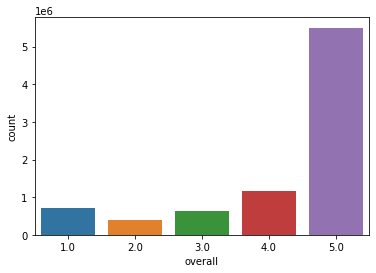

In [46]:
sns.countplot(x = df["overall"])

<BarContainer object of 5 artists>

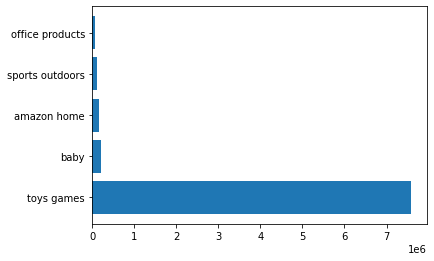

In [47]:
a=df['main_cat'].value_counts().head(5)
a=pd.DataFrame(a)
plt.barh(a.index,a.main_cat)

<BarContainer object of 10 artists>

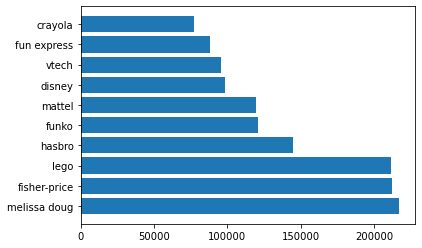

In [48]:
b=df['brand'].value_counts().head(10)
b=pd.DataFrame(b)
plt.barh(b.index,b.brand)

In [49]:
#df.hist(bins=50,figsize=(20,15))
#plt.show

**NLP**

In [50]:
"""df.loc[df['overall'] < 3,'Sentiment'] = 'negative'
 
#4,5->positive
df.loc[df['overall'] > 3,'Sentiment'] = 'positive'


df.loc[df['overall'] == 3,'Sentiment'] = 'neutral'"""

"df.loc[df['overall'] < 3,'Sentiment'] = 'negative'\n \n#4,5->positive\ndf.loc[df['overall'] > 3,'Sentiment'] = 'positive'\n\n\ndf.loc[df['overall'] == 3,'Sentiment'] = 'neutral'"

In [51]:
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
 
df['reviewText']=df['reviewText'].apply(clean_review)

In [52]:
from textblob import TextBlob
# function to calculate subjectivity
    # function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [53]:
df['Polarity'] = df['reviewText'].apply(getPolarity) 
df['Analysis'] = df['Polarity'].apply(analysis)
df.head()

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,category,brand,main_cat,Polarity,Analysis
0,2.0,,a1idmi31weanaf,0020232233,mackenzie kent,comes dm screen space screen absolute premium ...,toys games grown-up toys games,gale force nine,toys games,-0.242857,Negative
1,1.0,,a4bcevvz4y3v3,0020232233,jonathan christian,open letter galeforce9 unpainted miniatures ba...,toys games grown-up toys games,gale force nine,toys games,-0.019468,Negative
2,3.0,,a2ez9py1ihhbx0,0020232233,unpreparedtodie,nice art nice printing two panels filled gener...,toys games grown-up toys games,gale force nine,toys games,0.118243,Positive
3,5.0,,a139pxttc2lghz,0020232233,ashley,amazing buy bought gift new dm perfect,toys games grown-up toys games,gale force nine,toys games,0.578788,Positive
4,1.0,,a3ib33v29xil8o,0020232233,oghma em,review gf9 previous screens completely unneces...,toys games grown-up toys games,gale force nine,toys games,-0.316667,Negative


In [54]:
df.Analysis.value_counts()

Positive    6747280
Negative     904967
Neutral      739837
Name: Analysis, dtype: int64

In [55]:
df.head()

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,category,brand,main_cat,Polarity,Analysis
0,2.0,,a1idmi31weanaf,0020232233,mackenzie kent,comes dm screen space screen absolute premium ...,toys games grown-up toys games,gale force nine,toys games,-0.242857,Negative
1,1.0,,a4bcevvz4y3v3,0020232233,jonathan christian,open letter galeforce9 unpainted miniatures ba...,toys games grown-up toys games,gale force nine,toys games,-0.019468,Negative
2,3.0,,a2ez9py1ihhbx0,0020232233,unpreparedtodie,nice art nice printing two panels filled gener...,toys games grown-up toys games,gale force nine,toys games,0.118243,Positive
3,5.0,,a139pxttc2lghz,0020232233,ashley,amazing buy bought gift new dm perfect,toys games grown-up toys games,gale force nine,toys games,0.578788,Positive
4,1.0,,a3ib33v29xil8o,0020232233,oghma em,review gf9 previous screens completely unneces...,toys games grown-up toys games,gale force nine,toys games,-0.316667,Negative


In [57]:
# df=df.drop('title',axis=1)

In [ ]:
# df.to_csv('/content/drive/MyDrive/Project/main_toys.csv')